In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#load dataset
df=pd.read_csv(r"C:\Users\Abel\Downloads\SalaryData_Train.csv")

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#statisticsl info of dataset
df.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(30161, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


<AxesSubplot:>

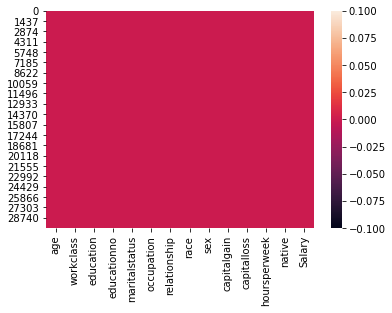

In [7]:
#visualization of null values
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='count', ylabel='occupation'>

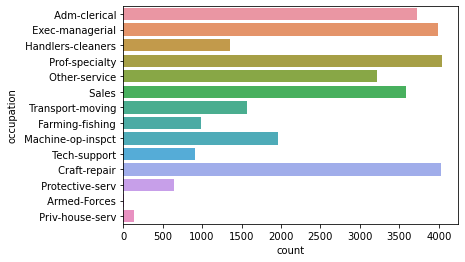

In [8]:
#visualization
sns.countplot(y='occupation',data=df)

## As there are many columns we will reduce it using PCA as SVM has curse of dimensionality

In [39]:
df_std=pd.get_dummies(df.iloc[:,0:13])

In [11]:
from sklearn.decomposition import PCA

In [13]:
#pca building
pca=PCA()
models=pca.fit_transform(df_std)
pca.explained_variance_ratio_


array([9.97028887e-01, 2.96523080e-03, 3.21654996e-06, 2.47666087e-06,
       1.15261075e-07, 1.34303647e-08, 5.66366784e-09, 4.77562558e-09,
       4.11095521e-09, 3.53987569e-09, 3.25147675e-09, 3.15139686e-09,
       2.67532748e-09, 2.47298516e-09, 2.20258863e-09, 2.10713289e-09,
       2.01756677e-09, 1.67138514e-09, 1.66373697e-09, 1.54435264e-09,
       1.43391115e-09, 1.32601386e-09, 1.13978022e-09, 1.03082493e-09,
       9.66054477e-10, 9.17314210e-10, 8.31584217e-10, 8.04397099e-10,
       7.82867024e-10, 6.96427672e-10, 6.53124421e-10, 6.44952274e-10,
       6.13321309e-10, 5.97137667e-10, 5.83882500e-10, 5.69732860e-10,
       5.04382380e-10, 4.87905596e-10, 4.41210486e-10, 3.59216477e-10,
       3.47170332e-10, 3.00107189e-10, 2.73600286e-10, 2.57342355e-10,
       2.51258191e-10, 2.33378651e-10, 2.27158867e-10, 1.65052491e-10,
       1.50231355e-10, 1.07676376e-10, 9.44212703e-11, 8.95122705e-11,
       7.42003347e-11, 6.42022683e-11, 6.13977196e-11, 6.01989680e-11,
      

In [15]:
#seperating input and output
x=pd.DataFrame(models)
x=x.iloc[:,0:2].values
y=df.iloc[:,-1]


In [16]:
#Grid search for best Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [18]:
gs=GridSearchCV(estimator=SVC(),param_grid={'C':[1,0.1,0.003],'gamma':[1,2,0.2,0.001]})

In [19]:
gs.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.003], 'gamma': [1, 2, 0.2, 0.001]})

In [20]:
#best score for c and gamma
gs.best_score_
gs.best_params_

{'C': 1, 'gamma': 1}

In [21]:
#import svc
from sklearn.svm import SVC

In [22]:
model=SVC(C=1,gamma=1,kernel='rbf')

In [23]:
#buiding Model
model.fit(x,y)

SVC(C=1, gamma=1)

In [24]:
#loading test dataset
df_test=pd.read_csv(r"C:\Users\Abel\Downloads\SalaryData_Test.csv")

In [25]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [27]:
df_std1=pd.get_dummies(df_test.iloc[:,0:13])


In [28]:
#reducing the column using PCA
pca1=PCA()
model1=pca1.fit_transform(df_std1)
var=pca.explained_variance_ratio_
var

array([9.97028887e-01, 2.96523080e-03, 3.21654996e-06, 2.47666087e-06,
       1.15261075e-07, 1.34303647e-08, 5.66366784e-09, 4.77562558e-09,
       4.11095521e-09, 3.53987569e-09, 3.25147675e-09, 3.15139686e-09,
       2.67532748e-09, 2.47298516e-09, 2.20258863e-09, 2.10713289e-09,
       2.01756677e-09, 1.67138514e-09, 1.66373697e-09, 1.54435264e-09,
       1.43391115e-09, 1.32601386e-09, 1.13978022e-09, 1.03082493e-09,
       9.66054477e-10, 9.17314210e-10, 8.31584217e-10, 8.04397099e-10,
       7.82867024e-10, 6.96427672e-10, 6.53124421e-10, 6.44952274e-10,
       6.13321309e-10, 5.97137667e-10, 5.83882500e-10, 5.69732860e-10,
       5.04382380e-10, 4.87905596e-10, 4.41210486e-10, 3.59216477e-10,
       3.47170332e-10, 3.00107189e-10, 2.73600286e-10, 2.57342355e-10,
       2.51258191e-10, 2.33378651e-10, 2.27158867e-10, 1.65052491e-10,
       1.50231355e-10, 1.07676376e-10, 9.44212703e-11, 8.95122705e-11,
       7.42003347e-11, 6.42022683e-11, 6.13977196e-11, 6.01989680e-11,
      

In [32]:
#test inputs
x_test=pd.DataFrame(model1)
x_test=x_test.iloc[:,0:2]


In [34]:
#predicting the output 
y_pred=model.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [36]:
#actual output
y_test=df_test.iloc[:,-1]

In [37]:
#accuracy 
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     11360
        >50K       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



D:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
